In [131]:
# importing important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

cars=pd.read_csv('https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Car_pricing_prediction/CarPrice_Assignment.csv')

In [132]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Understanding various variables

In [133]:
cars.info() #short informatuion of the type of data that each variable has.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [134]:
cars['symboling'].astype('category').value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [135]:
cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

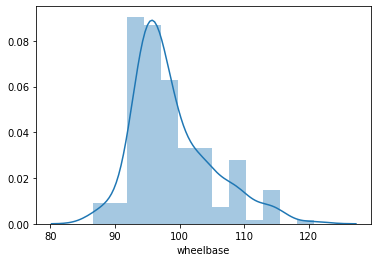

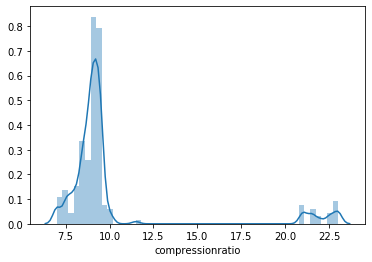

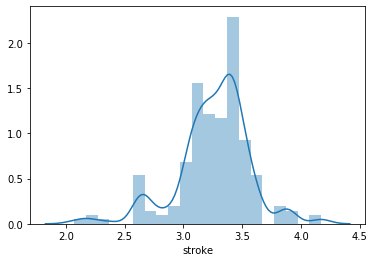

In [136]:
sns.distplot(cars['wheelbase'])
plt.show()
sns.distplot(cars['compressionratio'])
plt.show()
sns.distplot(cars['stroke'])
plt.show()

In [137]:
# the target variable should be linearly related to at least one another numeric variable. Let's see whether that's true in this case.
cars_numeric=cars.select_dtypes(include=['float64','int'])
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,13495.0
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,16500.0
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,16500.0
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,13950.0
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,17450.0


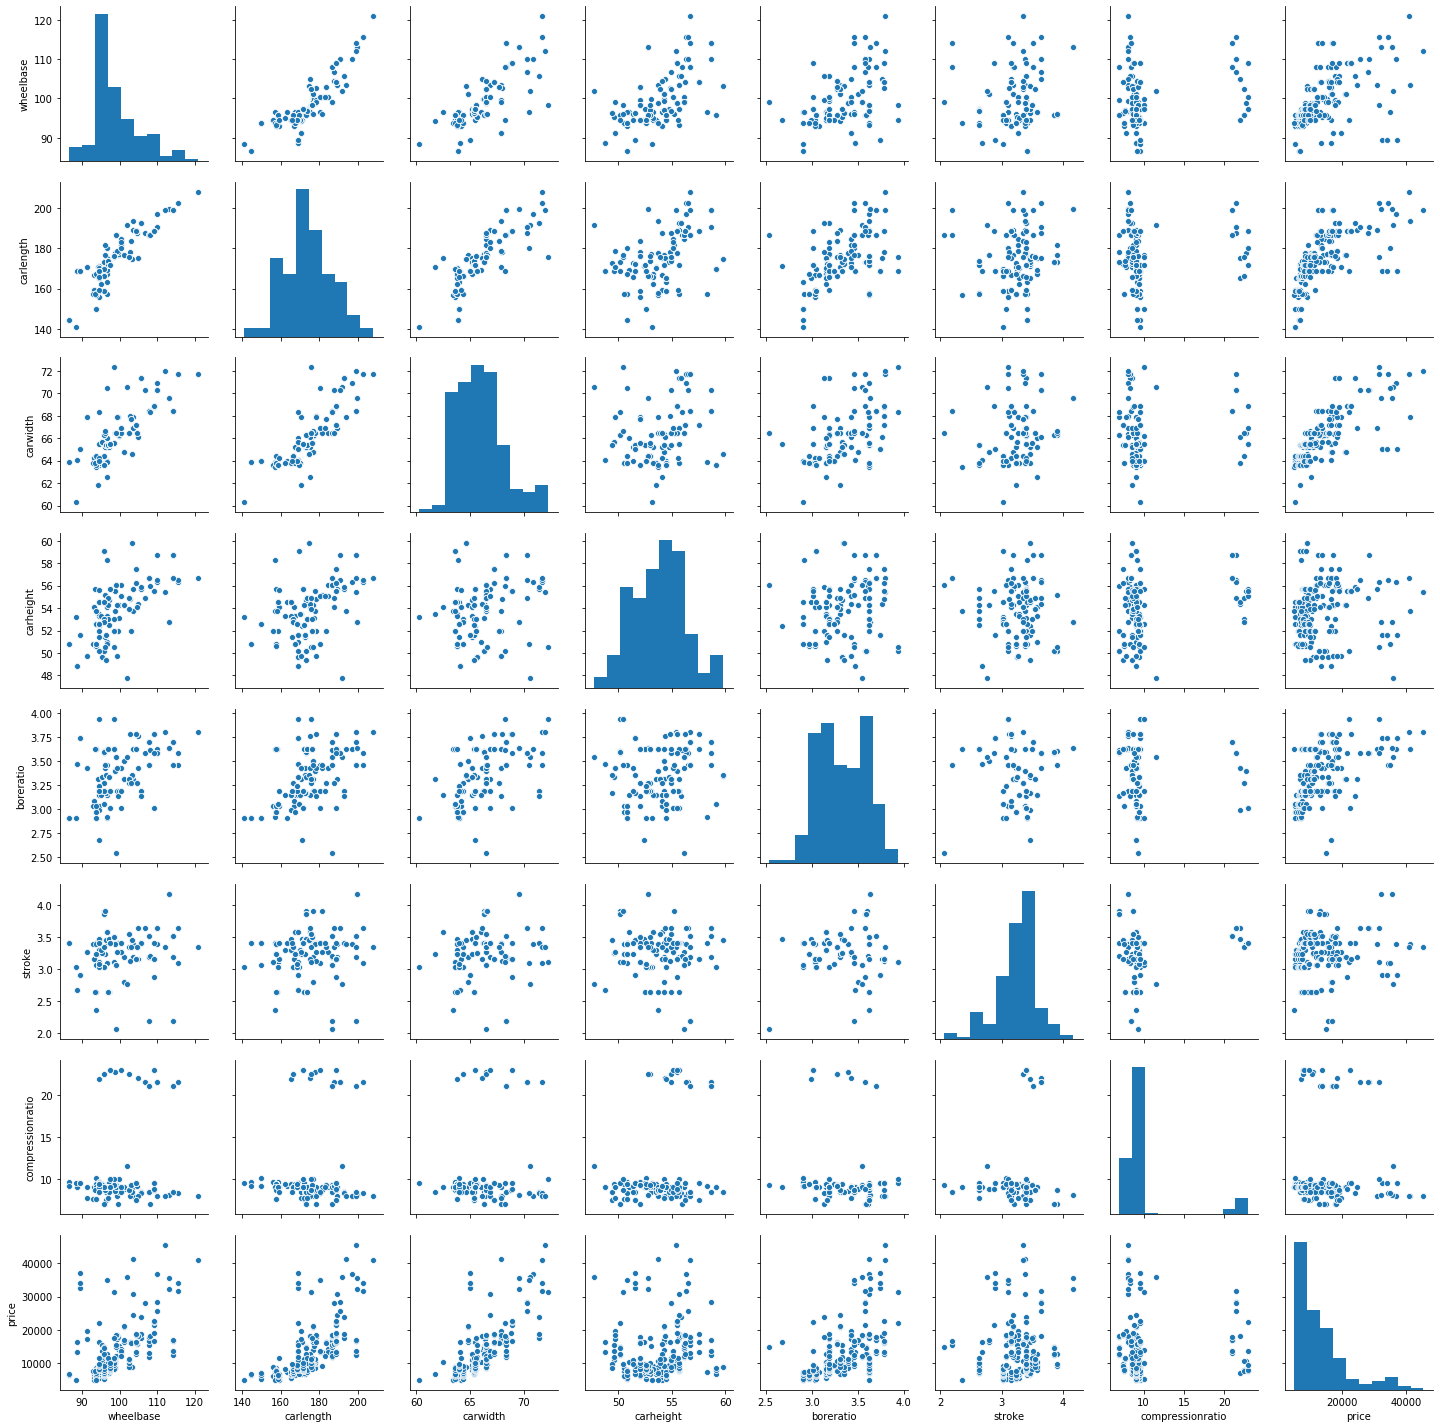

In [138]:
# now, we will make pairwise plot to see target variables vs individual relation
sns.pairplot(cars_numeric)
plt.show()

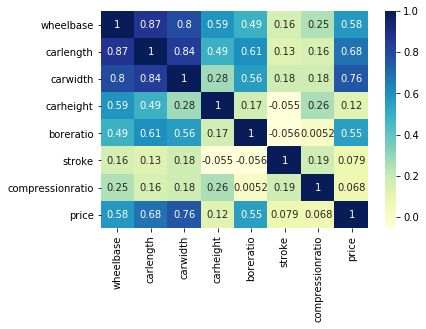

In [139]:
# we would prefer heatmap of correaltion
cor=cars_numeric.corr()
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [140]:
## converting symboling to categorical variables
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null object
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm     

In [141]:
#extracting car's company name uniquely #just split it with first space
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:30]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: CarName, dtype: object

In [142]:
# add a column of company name
cars['car_company']=carnames

In [143]:
#checking the car names
cars['car_company'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
vw              2
maxda           2
renault         2
mercury         1
porcshce        1
toyouta         1
vokswagen       1
Nissan          1
Name: car_company, dtype: int64

In [144]:
#some car names has been misspelled, so, replace with correct names
# volkswagen
cars.loc[(cars['car_company'] == "vw") | 
         (cars['car_company'] == "vokswagen")
         , 'car_company'] = 'volkswagen'

# porsche
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'

#checking again
cars['car_company'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: car_company, dtype: int64

In [145]:
cars=cars.drop('CarName',axis=1)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

### Data Preparation

In [146]:
# spliting into X and y from main dataframe
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_company']]

y = cars['price']

In [147]:
## creating dummy variables for categorical variables

# extarct all categorical variable data
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [148]:
# convert the categorical data into dummy datas such 1s and 0s.
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
# Now,drop the categorical variables and add the new variables with encoded values
X=X.drop(cars_categorical.columns,axis=1)
X=pd.concat([X,cars_dummies],axis=1)
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


In [150]:
# scaling the features
from sklearn.preprocessing import scale
# storing column names in cols, since column names are (annoyingly) lost after scaling (the df is converted to a numpy array)
cols=X.columns
X=pd.DataFrame(scale(X))
X.columns=cols
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812


In [151]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Model fitting

In [152]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
y_pred=lm.predict(X_test) # prediction

#finding the r-squared value for the test
from sklearn.metrics import r2_score

r2=r2_score(y_test,y_pred)
print(r2)

0.838262139339907


We will explore using lesser number of features in model using recursive feaature elimination (RFE)

In [154]:
from sklearn.feature_selection import RFE

lm=LinearRegression()

#try with 15 features
rfe15 = RFE(lm, 15)
rfe15.fit(X_train, y_train)

#extracting those 15 features with associated ranking
print(rfe15.support_)           
print(rfe15.ranking_)

[False False  True False  True  True  True  True False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False  True  True  True
 False  True  True  True False False False False False False False False
  True False False False False False False False False False False  True
 False  True False False False False False False]
[ 4  5  1  7  1  1  1  1  9 35 13 46 22 25 27 28 26 29 11  2 37 19  6 17
 18 48 23  1 33 47 24 20 38  1  1  1 32  1  1  1 14 44 10 52 45 50 53 36
  1 39 30 15 21 49 34 42 54  3 40  1 16  1 51  8 31 43 41 12]


In [155]:
# R-squared value for RFE
y_pred=rfe15.predict(X_test)
print(r2_score(y_test,y_pred))

0.8941491916479423


In [156]:
#try with 4 features
from sklearn.feature_selection import RFE #import it again
rfe4=RFE(lm,4)
rfe4.fit(X_train, y_train) # fitting
y_pred = rfe4.predict(X_test) # priction
print(r2_score(y_test, y_pred)) # R-squared value

0.8652200543723239


Both resulted near R-Squared values, therefore,
We have to explore adjusted r-squared value, which penalises a model for having more features.

In [157]:
# Use of statsmodel for adj-R-sqaured
import statsmodels.api as sm

#try on 15 feature RFE
col15=X_train.columns[rfe15.support_] #storing 15 columns
X_train_rfe15 = X_train[col15] #extracting those 15 feature's value

#add a constant to the model
X_train_rfe15 = sm.add_constant(X_train_rfe15)
X_train_rfe15.head()

C:\Users\Manjeet Keshav\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,carwidth,curbweight,enginesize,boreratio,stroke,enginelocation_rear,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,car_company_bmw,car_company_peugeot,car_company_porsche
122,1.0,-0.984972,-0.701886,-0.695874,-1.331531,-0.081241,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.23812,-0.158114
125,1.0,1.117866,0.428245,0.579974,2.258638,-0.464834,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.23812,6.324555
166,1.0,-0.891512,-0.492032,-0.695874,-0.332206,-0.560733,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.23812,-0.158114
1,1.0,-0.844782,-0.014566,0.074449,0.519071,-1.839377,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.23812,-0.158114
199,1.0,0.603839,1.157921,0.074449,1.074252,-0.336970,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.23812,-0.158114


In [158]:
lm15=sm.OLS(y_train,X_train_rfe15).fit() #fittting OLS model
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Thu, 31 Oct 2019   Prob (F-statistic):           1.03e-70
Time:                        21:52:49   Log-Likelihood:                -1283.6
No. Observations:                 143   AIC:                             2597.
Df Residuals:                     128   BIC:                             2642.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.347e+

In [159]:
## prediction by lm15 model
X_test_rfe15 = X_test[col15]
X_test_rfe15 = sm.add_constant(X_test_rfe15, has_constant='add') # add constant
X_test_rfe15.info()


# # Making predictions
y_pred = lm15.predict(X_test_rfe15)

print(r2_score(y_test,y_pred))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 16 columns):
const                    62 non-null float64
carwidth                 62 non-null float64
curbweight               62 non-null float64
enginesize               62 non-null float64
boreratio                62 non-null float64
stroke                   62 non-null float64
enginelocation_rear      62 non-null float64
enginetype_rotor         62 non-null float64
cylindernumber_five      62 non-null float64
cylindernumber_four      62 non-null float64
cylindernumber_three     62 non-null float64
cylindernumber_twelve    62 non-null float64
cylindernumber_two       62 non-null float64
car_company_bmw          62 non-null float64
car_company_peugeot      62 non-null float64
car_company_porsche      62 non-null float64
dtypes: float64(16)
memory usage: 8.2 KB
0.8941491916479423


In [160]:
# Do the samne for lm4 model
col4 = X_train.columns[rfe4.support_]
X_train_rfe4 = X_train[col4]
X_train_rfe4 = sm.add_constant(X_train_rfe4)
lm4 = sm.OLS(y_train, X_train_rfe4).fit()   
print(lm4.summary())
X_test_rfe4 = X_test[col4]
X_test_rfe4 = sm.add_constant(X_test_rfe4, has_constant='add')
X_test_rfe4.info()
y_pred = lm4.predict(X_test_rfe4)

print(r2_score(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     177.3
Date:                Thu, 31 Oct 2019   Prob (F-statistic):           2.47e-53
Time:                        21:52:49   Log-Likelihood:                -1354.3
No. Observations:                 143   AIC:                             2719.
Df Residuals:                     138   BIC:                             2733.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.345e+04    

C:\Users\Manjeet Keshav\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Adj-R_squared for lm4 is 83% and for lm15 it is 93%....Try finding the optimal number of features to be included and plot them

In [161]:
n_features_list = list(range(4, 20))
adjusted_r2 = []
r2 = []
test_r2 = []

for n_features in range(4, 20):

    # RFE with n features
    lm = LinearRegression()

    # specify number of features
    rfe_n = RFE(lm, n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # subset the features selected by rfe(n)
    col_n = X_train.columns[rfe_n.support_]

    # subsetting training data for n selected columns
    X_train_rfe_n = X_train[col_n]

    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    # fitting the model with n variables
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    adjusted_r2.append(lm_n.rsquared_adj)
    r2.append(lm_n.rsquared)
    
    
    # making predictions using rfe(n) sm model
    X_test_rfe_n = X_test[col_n]


    # # Adding a constant variable 
    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')



    # # Making predictions
    y_pred = lm_n.predict(X_test_rfe_n)
    
    test_r2.append(r2_score(y_test, y_pred))

C:\Users\Manjeet Keshav\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Manjeet Keshav\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Manjeet Keshav\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Manjeet Keshav\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Manjeet Keshav\Anaconda3\lib\site-packages\numpy\core\fromnumer

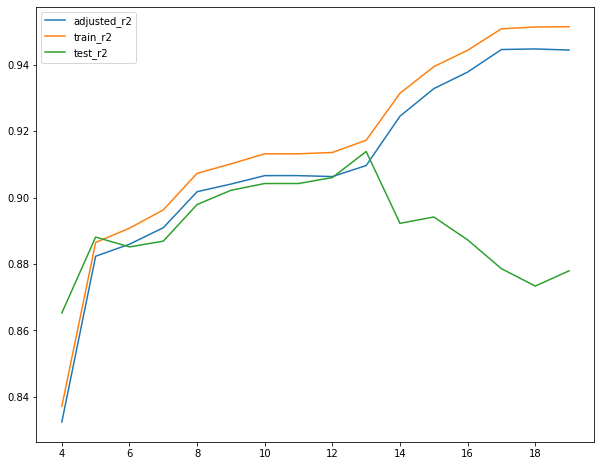

In [162]:
# plotting adjusted_r2 against n_features
plt.figure(figsize=(10, 8))
plt.plot(n_features_list, adjusted_r2, label="adjusted_r2")
plt.plot(n_features_list, r2, label="train_r2")
plt.plot(n_features_list, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()

Test_r2 score doesn't increase much anyway from n=6 to n=12. It is thus wiser to choose a simpler model, and so we will choose n=6.

## Final Model

Codes from optimal features can directly be copied....just keep n_feature=6

In [163]:

lm = LinearRegression()

n_features = 6

# specify number of features
rfe_n = RFE(lm, n_features)

# fit with 6 features
rfe_n.fit(X_train, y_train)

# subset the features selected by rfe6
col_n = X_train.columns[rfe_n.support_]

# subsetting training data for 6 selected columns
X_train_rfe_n = X_train[col_n]

# add a constant to the model
X_train_rfe_n = sm.add_constant(X_train_rfe_n)


# fitting the model with 6 variables
lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
adjusted_r2.append(lm_n.rsquared_adj)
r2.append(lm_n.rsquared)


# making predictions using rfe6 sm model
X_test_rfe_n = X_test[col_n]


# # Adding a constant variable 
X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')



# # Making predictions
y_pred = lm_n.predict(X_test_rfe_n)

print(r2_score(y_test, y_pred))

0.885142287731257


C:\Users\Manjeet Keshav\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


##### model evaluation

Let's now evaluate the model in terms of its assumptions. We should test that:
    
    The error terms are normally distributed with mean approximately 0
    
    There is little correlation between the predictors
    
    Homoscedasticity, i.e. the 'spread' or 'variance' of the error term (y_true-y_pred) is constant

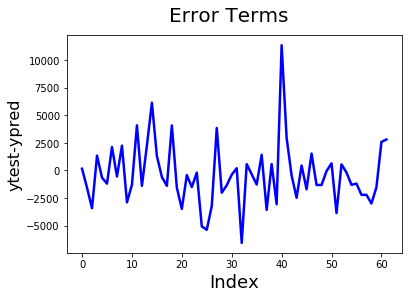

In [164]:
c = [i for i in range(len(y_pred))]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

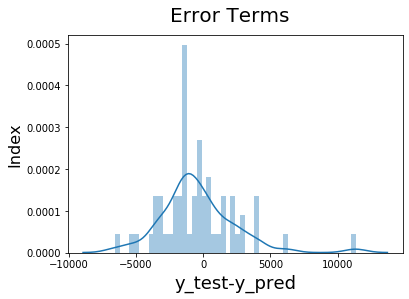

In [165]:
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

In [166]:
np.mean(y_test-y_pred) #mean

-382.73632450276716

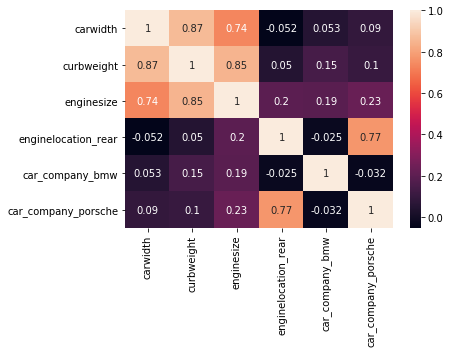

In [167]:
# checking multicollinearity
predictors = ['carwidth', 'curbweight', 'enginesize', 
             'enginelocation_rear', 'car_company_bmw', 'car_company_porsche']

cors = X.loc[:, list(predictors)].corr()
sns.heatmap(cors, annot=True)
plt.show()

Some of the variables are highly correlated such as (1) curbweight and carwidth (2) enginsize and curbweight
So, will try eleminating one feature each from the pair turn by turn

In [168]:
#eleminate curbweight
X_train_rfe_n=X_train_rfe_n.drop(['curbweight'],axis=1)
X_train_rfe_n.head()

,const,carwidth,enginesize,enginelocation_rear,car_company_bmw,car_company_porsche
122,1.0,-0.984972,-0.695874,-0.121867,-0.201517,-0.158114
125,1.0,1.117866,0.579974,-0.121867,-0.201517,6.324555
166,1.0,-0.891512,-0.695874,-0.121867,-0.201517,-0.158114
1,1.0,-0.844782,0.074449,-0.121867,-0.201517,-0.158114
199,1.0,0.603839,0.074449,-0.121867,-0.201517,-0.158114


In [169]:
X_test_rfe_n=X_test.loc[:,X_train_rfe_n.columns]
X_test_rfe_n['const']=1
#X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')
X_test_rfe_n.head()

C:\Users\Manjeet Keshav\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,const,carwidth,enginesize,enginelocation_rear,car_company_bmw,car_company_porsche
160,1,-0.704593,-0.695874,-0.121867,-0.201517,-0.158114
186,1,-0.190566,-0.431076,-0.121867,-0.201517,-0.158114
59,1,0.276731,-0.118132,-0.121867,-0.201517,-0.158114
165,1,-0.891512,-0.695874,-0.121867,-0.201517,-0.158114
140,1,-0.984972,-0.455148,-0.121867,-0.201517,-0.158114


In [170]:
# fitting the model with 5 variables
import statsmodels.api as sm
lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
adjusted_r2=lm_n.rsquared_adj
print(adjusted_r2)
r2=lm_n.rsquared
print(r2)

# # Making predictions
y_pred = lm_n.predict(X_test_rfe_n)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.874029039675928
0.8784646368704376
0.8947238973824398


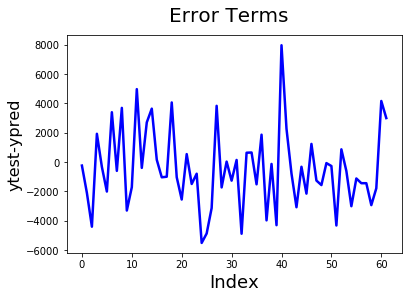

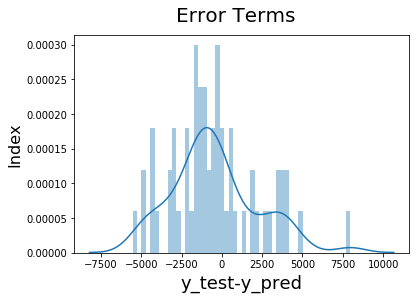

-467.5837075869635


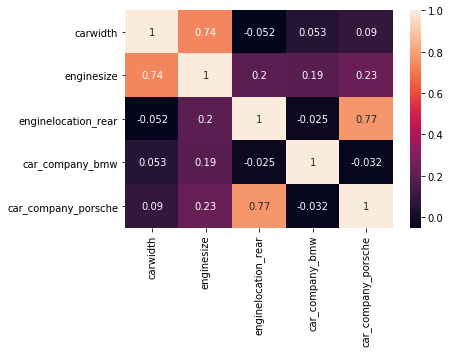

In [171]:
c = [i for i in range(len(y_pred))]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

print(np.mean(y_test-y_pred)) #mean

# checking multicollinearity
predictors = ['carwidth', 'enginesize', 
             'enginelocation_rear', 'car_company_bmw', 'car_company_porsche']

cors = X.loc[:, list(predictors)].corr()
sns.heatmap(cors, annot=True)
plt.show()

We have 89% score which is better than before, however loss in adj-R-squared

Now, we will eleminate the car_company_porsche

In [172]:
X_train_rfe_n=X_train_rfe_n.drop(['car_company_porsche'],axis=1)
X_test_rfe_n=X_test.loc[:,X_train_rfe_n.columns]
X_test_rfe_n['const']=1

C:\Users\Manjeet Keshav\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [173]:
# fitting the model with 4 variables
import statsmodels.api as sm
lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
adjusted_r2=lm_n.rsquared_adj
print(adjusted_r2)
r2=lm_n.rsquared
print(r2)

# # Making predictions
y_pred = lm_n.predict(X_test_rfe_n)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.8731039791147784
0.8766785149143621
0.8945476925367308


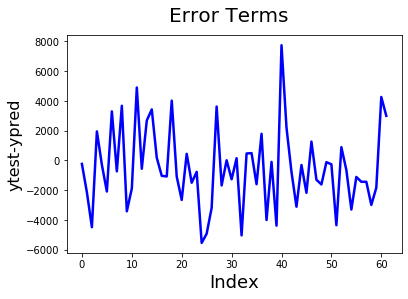

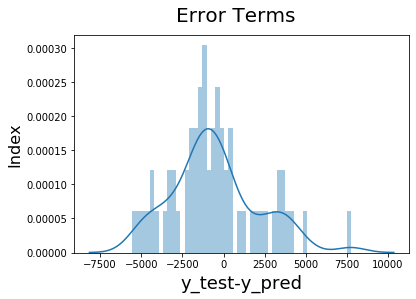

-516.0824395313238


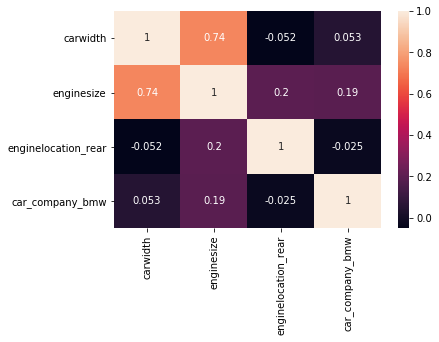

In [175]:
c = [i for i in range(len(y_pred))]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

print(np.mean(y_test-y_pred)) #mean

# checking multicollinearity
predictors = ['carwidth', 'enginesize', 
             'enginelocation_rear', 'car_company_bmw']

cors = X.loc[:, list(predictors)].corr()
sns.heatmap(cors, annot=True)
plt.show()

We have 89% score with test data which is almost same, also, loss in adj-R-squared is almost same. Further, elimination of variables lead to more worst fittings.

In [180]:
print(lm_n.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     245.3
Date:                Thu, 31 Oct 2019   Prob (F-statistic):           1.18e-61
Time:                        22:02:25   Log-Likelihood:                -1334.4
No. Observations:                 143   AIC:                             2679.
Df Residuals:                     138   BIC:                             2694.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.343e+04    

## Therefore, the existing model with 'carwidth', 'enginesize', 'enginelocation_rear', 'car_company_bmw' variables suits very well and is good model.